K Means Clustering



About Dataset :
This dataset helps estimate obesity levels based on eating habits, family history and physical condition. It includes data from individuals in Mexico, Peru, and Colombia, covering 16 lifestyle and health-related features with 2111 records. 

Most of the data was generated using synthetic techniques, while some were collected directly from users through a web platform. It is useful for classification, regression, and clustering tasks.

Source: UCI Machine Learning Repository

Inspiration:
Understanding lifestyle factors that contribute to obesity can help with early intervention, health recommendations, and machine learning applications in healthcare.

Column Descriptions:
Gender – Male or Female.

Age – The person’s age in years.

Height – Height in meters.

Weight – Weight in kilograms.

family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).

FAVC – If the person frequently consumes high-calorie foods (yes/no).

FCVC – Frequency of vegetable consumption (scale from 1 to 3).

NCP – Number of main meals per day.

CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).

SMOKE – Whether the person smokes (yes/no).

CH2O – Daily water intake (scale from 1 to 3).

SCC – If the person monitors their calorie intake (yes/no).

FAF – Physical activity frequency (scale from 0 to 3).

TUE – Time spent using technology (scale from 0 to 3).

CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).

MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking)

This dataset provides a structured view of how different lifestyle factors relate to obesity levels, making it useful for healthcare analysis and decision-making.

In [1093]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [1094]:
df = pd.read_csv(r"C:\Users\Preeth Shivani\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv")

In [1095]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


Exploratory Data Analysis (EDA) 

In [1096]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [1097]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [1098]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [1099]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [1100]:
df.duplicated().sum() # Checking for duplicate values

np.int64(24)

In [1101]:
df= df.drop_duplicates() # Removing duplicate values
df.duplicated().sum() # Checking for duplicate count which is now 0 

np.int64(0)

In [1102]:
#Renaming Features
df.rename(columns={
    'FAVC': 'frequent_high_calorie_foods',  
    'FCVC': 'vegetable_consumption',  
    'NCP': 'main_meals_per_day',  
    'CAEC': 'snack_frequency',  
    'SMOKE': 'smoking_status',  
    'CH2O': 'daily_water_intake',  
    'SCC': 'calorie_monitoring',  
    'FAF': 'physical_activity_level',  
    'TUE': 'technology_usage_time',  
    'CALC': 'alcohol_consumption_frequency',  
    'MTRANS': 'mode_of_transportation',   
}, inplace=True)


In [1103]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_high_calorie_foods,vegetable_consumption,main_meals_per_day,snack_frequency,smoking_status,daily_water_intake,calorie_monitoring,physical_activity_level,technology_usage_time,alcohol_consumption_frequency,mode_of_transportation
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [1104]:
#Binary Encoding (Because there are only 0s and 1s )
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df['smoking_status'] = df['smoking_status'].map({'yes': 1, 'no': 0})
df['calorie_monitoring'] = df['calorie_monitoring'].map({'yes': 1, 'no': 0})
df['frequent_high_calorie_foods'] = df['frequent_high_calorie_foods'].map({'yes': 1, 'no': 0})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})


In [1105]:
from sklearn.preprocessing import OrdinalEncoder
#Ordinal Encoding (Because these values have a meaningful order or ranking)
encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
df[['alcohol_consumption_frequency']] = encoder.fit_transform(df[['alcohol_consumption_frequency']])
df[['snack_frequency']] = encoder.fit_transform(df[['snack_frequency']])


In [1106]:
#One-Hot Encoding (Because mode_of_transportation is a nominal categorical variable (no inherent order))

df = pd.get_dummies(df, columns=['mode_of_transportation'], dtype=int)


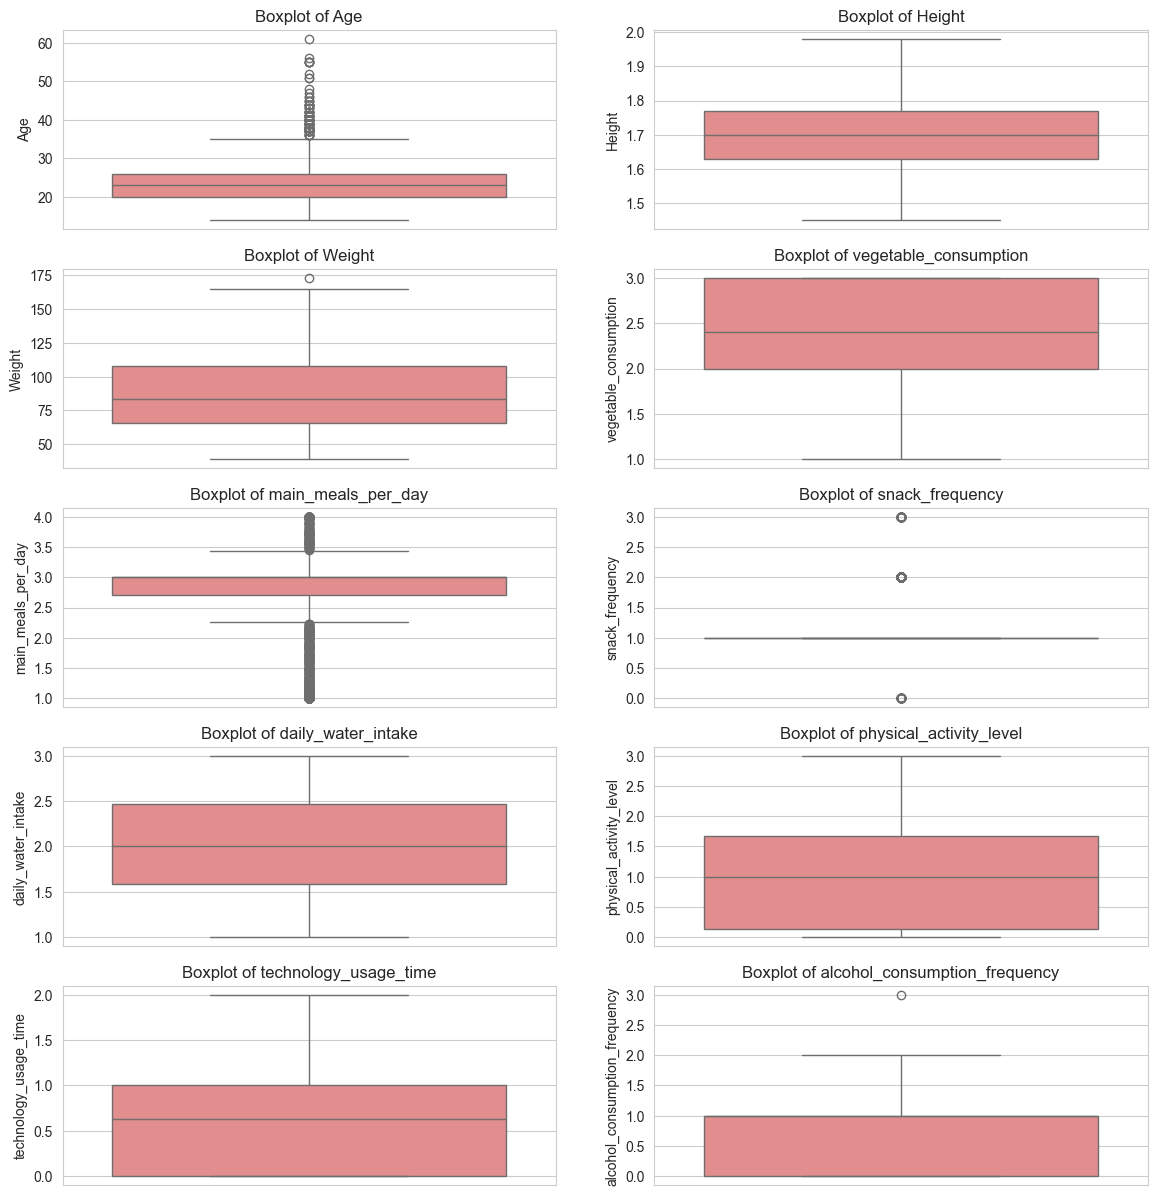

In [1107]:
# Creating Boxplot for each numerical feature
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 15))
axes = axes.flatten()   
num_features = ['Age', 'Height', 'Weight', 'vegetable_consumption', 'main_meals_per_day',
                'snack_frequency', 'daily_water_intake', 'physical_activity_level',  
                'technology_usage_time', 'alcohol_consumption_frequency']
df_numerical = df[num_features]
for i, col in enumerate(num_features):
    sns.boxplot(y=df_numerical[col], ax=axes[i], color="lightcoral") 
    axes[i].set_title(f"Boxplot of {col}")

plt.show()


Although the box plot indicates the presence of outliers, these values have been reviewed and confirmed as valid data points based on this specific dataset. Therefore, they are retained in the dataset for further analysis.

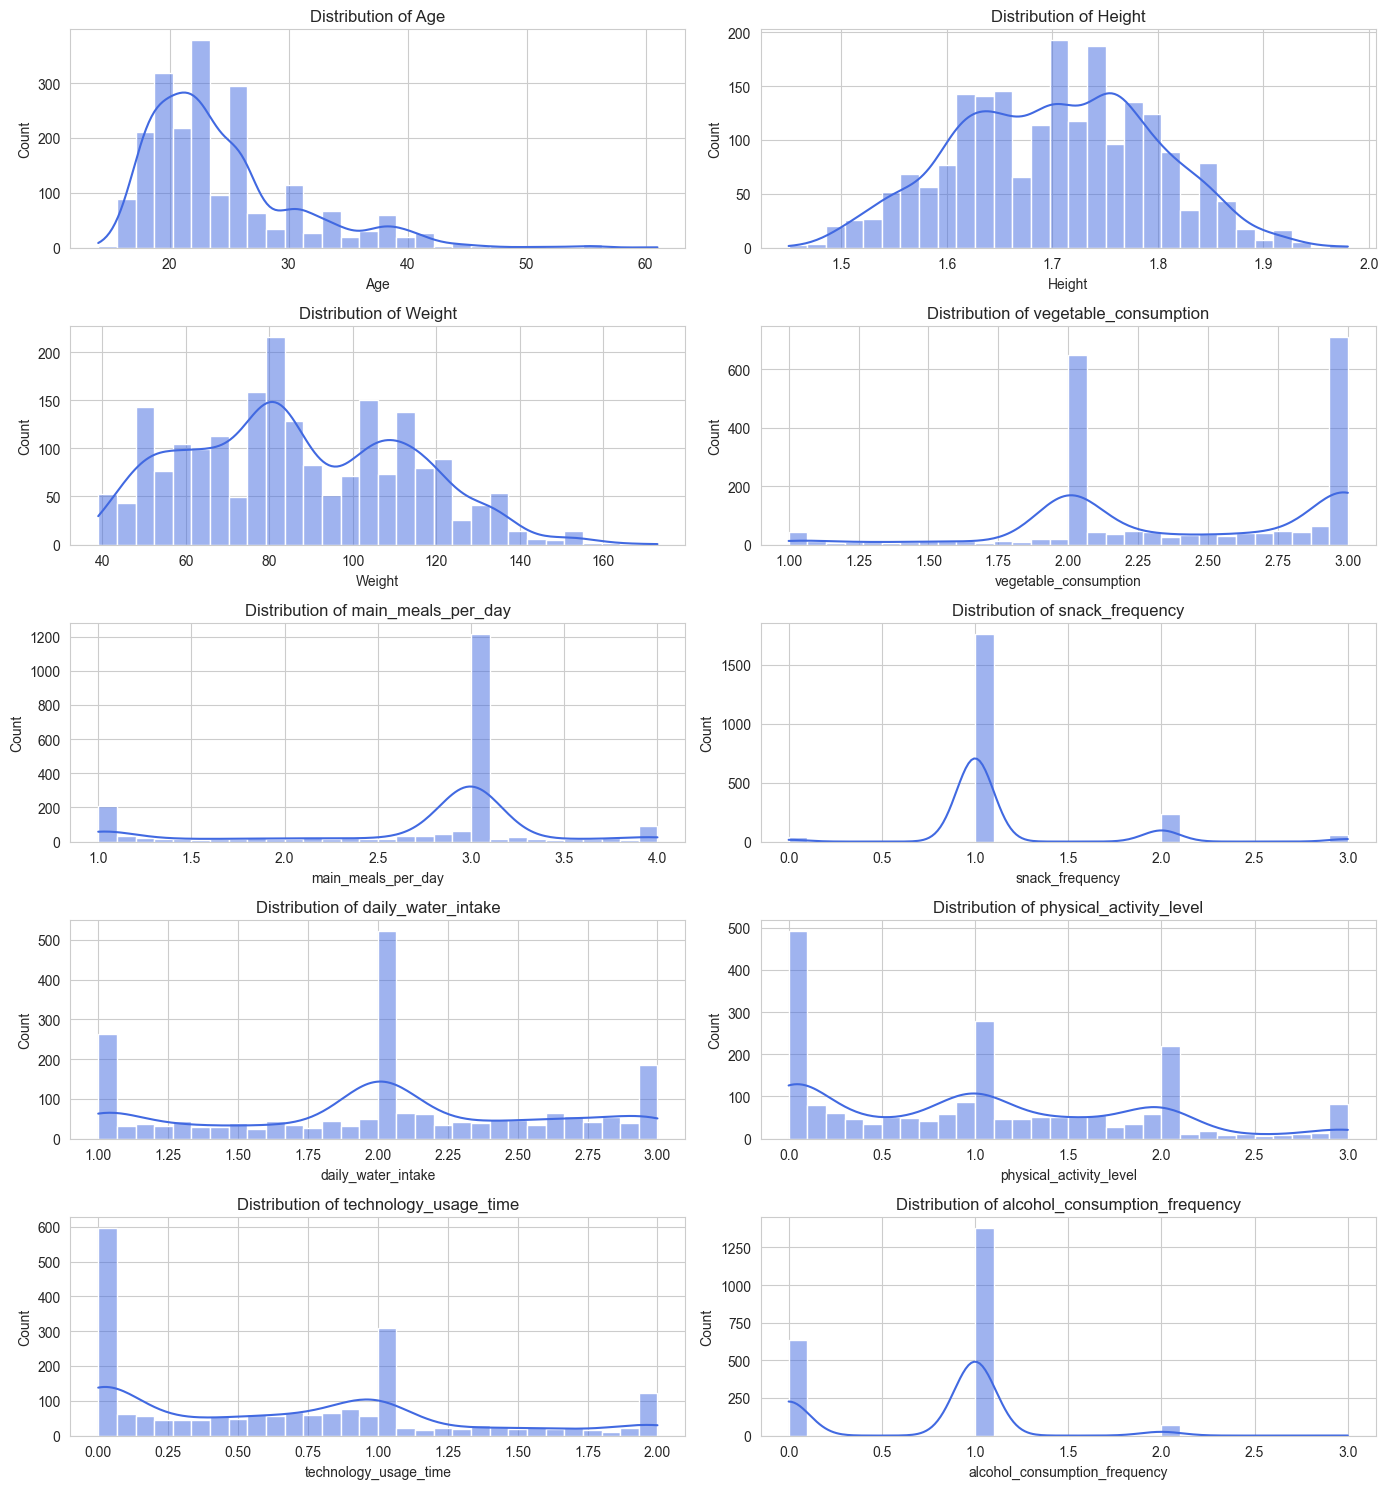

In [1108]:
num_features = ['Age', 'Height', 'Weight', 'vegetable_consumption', 
                'main_meals_per_day', 'snack_frequency', 
                'daily_water_intake', 'physical_activity_level', 
                'technology_usage_time', 'alcohol_consumption_frequency']

df_numerical = df[num_features]   

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 15))
axes = axes.flatten()  

# Creating histogram for each numerical feature
for i, col in enumerate(num_features):
    sns.histplot(df_numerical[col], kde=True, bins=30, ax=axes[i], color="royalblue")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

#####  Feature Scaling 

These numeric features have varying ranges and are continuous or ordinal in nature. Scaling them ensures that no feature dominates others in distance-based models like K means CLustering
'Age', 'Height', 'Weight', 'vegetable_consumption', 'main_meals_per_day', 'daily_water_intake', 'physical_activity_level','technology_usage_time'

These were scaled using **StandardScaler** to normalize them to zero mean and unit variance.
The features that are either already binary or one-hot encoded do not require scaling

In [1109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Features to scale
features_to_scale = ['Age', 'Height', 'Weight', 'vegetable_consumption', 
                     'main_meals_per_day', 'daily_water_intake', 
                     'physical_activity_level', 'technology_usage_time']

# Creating a new DataFrame with the scaled values
scaled_data = scaler.fit_transform(df[features_to_scale])
df_scaled = df.copy()  
df_scaled[features_to_scale] = scaled_data   


In [1110]:
df_scaled.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_high_calorie_foods,vegetable_consumption,main_meals_per_day,snack_frequency,smoking_status,daily_water_intake,calorie_monitoring,physical_activity_level,technology_usage_time,alcohol_consumption_frequency,mode_of_transportation_Automobile,mode_of_transportation_Bike,mode_of_transportation_Motorbike,mode_of_transportation_Public_Transportation,mode_of_transportation_Walking
0,1,-0.526224,-0.886168,-0.872984,1,0,-0.788153,0.390854,1.0,0,-0.007879,0,-1.186966,0.554220,0.0,0,0,0,1,0
1,1,-0.526224,-1.958800,-1.178508,1,0,1.082129,0.390854,1.0,1,1.636493,1,2.328834,-1.090499,1.0,0,0,0,1,0
2,0,-0.212668,1.044570,-0.376508,1,0,-0.788153,0.390854,1.0,0,-0.007879,0,1.156901,0.554220,2.0,0,0,0,1,0
3,0,0.414444,1.044570,0.005396,0,0,1.082129,0.390854,1.0,0,-0.007879,0,1.156901,-1.090499,2.0,0,0,0,0,1
4,0,-0.369446,0.830044,0.112329,0,0,-0.788153,-2.225330,1.0,0,-0.007879,0,-1.186966,-1.090499,1.0,0,0,0,1,0


In [1111]:
df_scaled.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'frequent_high_calorie_foods', 'vegetable_consumption',
       'main_meals_per_day', 'snack_frequency', 'smoking_status',
       'daily_water_intake', 'calorie_monitoring', 'physical_activity_level',
       'technology_usage_time', 'alcohol_consumption_frequency',
       'mode_of_transportation_Automobile', 'mode_of_transportation_Bike',
       'mode_of_transportation_Motorbike',
       'mode_of_transportation_Public_Transportation',
       'mode_of_transportation_Walking'],
      dtype='object')

# Employing PCA

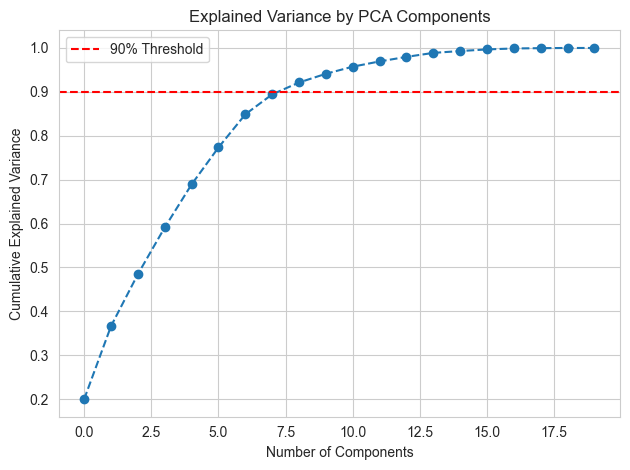

In [1112]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.legend()
plt.tight_layout()
plt.show()


We reach 90% cumulative explained variance at around component 8 , this means we can reduce our 20 features down to just 8 components while retaining 90% of the information.

In [1113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_data = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(8)])


Using the Elbow Method to determine the optimal number of clusters by plotting inertia for K values from 1 to 10.

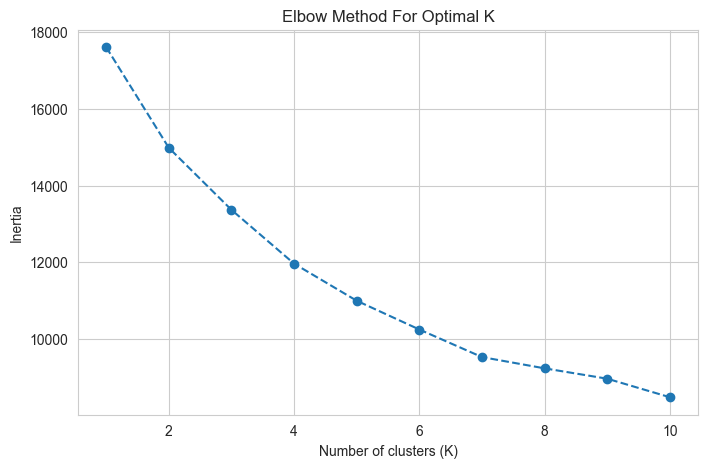

In [1114]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


Applying K-Means clustering with 4 clusters on PCA-reduced data and assigned cluster labels

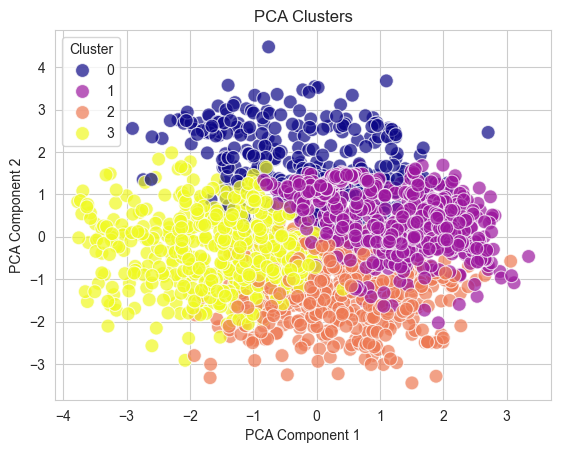

In [1115]:
from sklearn.cluster import KMeans

# Applying KMeans with the 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_df)

pca_df['Cluster'] = clusters

#Visualizing the Clusters
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='plasma', s=100, alpha=0.7)
plt.title('PCA Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


Mapping Labels for each Cluster

In [ ]:
cluster_name_mapping = {
    0: 'Healthy Weight',
    1: 'At Risk (Overweight)',
    2: 'Obese',
    3: 'Severely Obese'
}

pca_df['Cluster Name'] = pca_df['Cluster'].map(cluster_name_mapping)


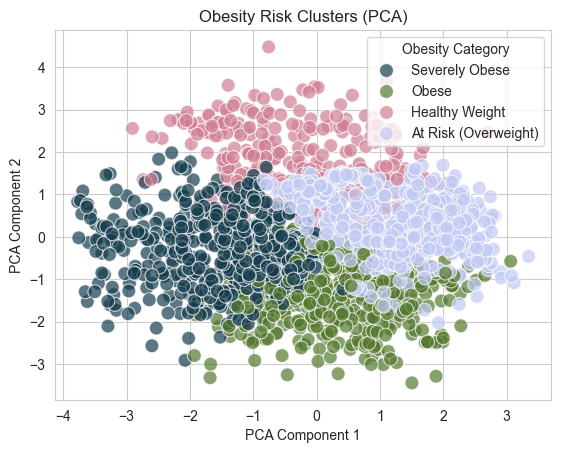

In [1121]:

#Visualizing the Clusters with mapped labels
sns.scatterplot(
    x=pca_df['PC1'], 
    y=pca_df['PC2'], 
    hue=pca_df['Cluster Name'], 
    palette='cubehelix', 
    s=100, 
    alpha=0.7
)
plt.title('Obesity Risk Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Obesity Category')
plt.show()


Mapping the Clusters to the Original dataset

In [1118]:
df['Cluster'] = kmeans.labels_ 
cluster_name_mapping = {
    0: 'Healthy Weight',
    1: 'At Risk (Overweight)',
    2: 'Obese',
    3: 'Severely Obese'
}

df['Obesity_Category'] = df['Cluster'].map(cluster_name_mapping)


In [1122]:
df.head()  # This shows original features + Cluster + Obesity Category, new features has been added at the end


,Gender,Age,Height,Weight,family_history_with_overweight,frequent_high_calorie_foods,vegetable_consumption,main_meals_per_day,snack_frequency,smoking_status,...,physical_activity_level,technology_usage_time,alcohol_consumption_frequency,mode_of_transportation_Automobile,mode_of_transportation_Bike,mode_of_transportation_Motorbike,mode_of_transportation_Public_Transportation,mode_of_transportation_Walking,Cluster,Obesity_Category
0,1,21,1.62,64.0,1,0,2.0,3.0,1.0,0,...,0.0,1.0,0.0,0,0,0,1,0,3,Severely Obese
1,1,21,1.52,56.0,1,0,3.0,3.0,1.0,1,...,3.0,0.0,1.0,0,0,0,1,0,2,Obese
2,0,23,1.80,77.0,1,0,2.0,3.0,1.0,0,...,2.0,1.0,2.0,0,0,0,1,0,2,Obese
3,0,27,1.80,87.0,0,0,3.0,3.0,1.0,0,...,2.0,0.0,2.0,0,0,0,0,1,2,Obese
4,0,22,1.78,89.8,0,0,2.0,1.0,1.0,0,...,0.0,0.0,1.0,0,0,0,1,0,3,Severely Obese
